In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import svm, datasets

In [24]:
hof_train = pd.read_csv("./Resources/kmeans_data_comb.csv")

In [25]:
hof_train.head()

,Assists per Game,Blocks per Game,Full Name,GP per Year,Last Year,MVP,Offensive Player,Points per Game,Rebounds per Game,Starting Year,Steals per Game,Year Inducted,Years Retired,Years to Induct,playerID,pos
0,2.531100,0.763158,Julius Shareef Abdur-Rahim,69.666667,2007,0,1,18.041866,7.497608,1996,0.983254,NaN,4.0,NaN,abdursh01,F
1,2.587750,0.462898,Nelison Anderson,65.307692,2001,0,1,14.338045,5.067138,1989,1.396938,NaN,10.0,NaN,anderni01,F-G
2,1.355612,0.235813,Shandon Rodriguez Anderson,79.300000,2005,0,0,7.170240,3.081967,1996,0.740227,NaN,6.0,NaN,andersh01,F-G
3,3.761350,0.112922,Gregory Carleton Anthony,78.090909,2001,0,0,6.928987,1.793946,1991,1.128056,NaN,10.0,NaN,anthogr01,G
4,1.541744,0.307050,Stacey Orlando Augmon,71.866667,2005,0,0,7.840445,3.149351,1991,0.955473,NaN,6.0,NaN,augmost01,G-F


In [26]:
data=hof_train.drop(['Starting Year','Last Year','Full Name','pos','Offensive Player','MVP','Years Retired','Years to Induct'], axis=1)

In [27]:
data

,Assists per Game,Blocks per Game,GP per Year,Points per Game,Rebounds per Game,Steals per Game,Year Inducted,playerID
0,2.531100,0.763158,69.666667,18.041866,7.497608,0.983254,NaN,abdursh01
1,2.587750,0.462898,65.307692,14.338045,5.067138,1.396938,NaN,anderni01
2,1.355612,0.235813,79.300000,7.170240,3.081967,0.740227,NaN,andersh01
3,3.761350,0.112922,78.090909,6.928987,1.793946,1.128056,NaN,anthogr01
4,1.541744,0.307050,71.866667,7.840445,3.149351,0.955473,NaN,augmost01
5,3.394293,0.088197,77.100000,7.546044,1.783398,0.915694,NaN,besttr01
6,6.711559,0.343584,72.538462,13.500530,4.162248,2.323436,NaN,blaylmo01
7,0.666286,2.475429,72.916667,7.862857,6.188571,0.616000,NaN,bradlsh01
8,5.997375,0.308399,69.272727,13.637795,3.013123,1.539370,NaN,brandte01
9,1.476151,1.003347,79.666667,8.892887,7.622594,0.819247,NaN,brownpj01


In [28]:
# hof_train.rename(columns={'Year Inducted':'YI'}, inplace=True)
data['YI'] = data[['Year Inducted']].sum(axis=1) > 0

In [29]:
from sklearn.model_selection import train_test_split
y = data['YI'].values.reshape(-1, 1)
data = data.drop(['YI','Year Inducted','playerID'] ,axis=1)
data.head()

,Assists per Game,Blocks per Game,GP per Year,Points per Game,Rebounds per Game,Steals per Game
0,2.531100,0.763158,69.666667,18.041866,7.497608,0.983254
1,2.587750,0.462898,65.307692,14.338045,5.067138,1.396938
2,1.355612,0.235813,79.300000,7.170240,3.081967,0.740227
3,3.761350,0.112922,78.090909,6.928987,1.793946,1.128056
4,1.541744,0.307050,71.866667,7.840445,3.149351,0.955473


In [30]:
feature_names = data.columns
data.head()

,Assists per Game,Blocks per Game,GP per Year,Points per Game,Rebounds per Game,Steals per Game
0,2.531100,0.763158,69.666667,18.041866,7.497608,0.983254
1,2.587750,0.462898,65.307692,14.338045,5.067138,1.396938
2,1.355612,0.235813,79.300000,7.170240,3.081967,0.740227
3,3.761350,0.112922,78.090909,6.928987,1.793946,1.128056
4,1.541744,0.307050,71.866667,7.840445,3.149351,0.955473


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,y, random_state=42)
X_train.head()

,Assists per Game,Blocks per Game,GP per Year,Points per Game,Rebounds per Game,Steals per Game
15,0.865150,1.134037,76.937500,7.803412,7.876523,0.625508
44,1.066477,0.294397,81.000000,8.454891,3.647673,0.529915
89,1.883510,2.418306,77.764706,20.898638,9.865356,0.951589
90,6.142702,0.072985,70.615385,19.071895,5.986928,0.776688
9,1.476151,1.003347,79.666667,8.892887,7.622594,0.819247


In [32]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

In [33]:
import numpy as np
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled,np.ravel(y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9156626506024096
Testing Data Score: 0.8928571428571429


In [35]:
model2 = SVC(kernel='linear')
model2.fit(X_test_scaled,np.ravel(y_test))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Testing Data Score: 0.9642857142857143


In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [50,100, 300,500,800],
              'gamma': [1,0.1, 0.01,0.001,0.0001]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [38]:
grid.fit(X_train_scaled,np.ravel(y_train))

C:\Users\dcoar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=50, gamma=1 ...................................................
[CV] .......... C=50, gamma=1, score=0.8214285714285714, total=   0.0s
[CV] C=50, gamma=1 ...................................................
[CV] .......... C=50, gamma=1, score=0.8928571428571429, total=   0.0s
[CV] C=50, gamma=1 ...................................................
[CV] .......... C=50, gamma=1, score=0.9629629629629629, total=   0.0s
[CV] C=50, gamma=0.1 .................................................
[CV] ........ C=50, gamma=0.1, score=0.8214285714285714, total=   0.0s
[CV] C=50, gamma=0.1 .................................................
[CV] ........ C=50, gamma=0.1, score=0.8928571428571429, total=   0.0s
[CV] C=50, gamma=0.1 .................................................
[CV] ........ C=50, gamma=0.1, score=0.9629629629629629, total=   0.0s
[CV] C=50, gamma=0.01 ................................................
[CV] ....... C=5

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
C:\Users\dcoar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [50, 100, 300, 500, 800], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [39]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 1}
0.891566265060241


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train_scaled, np.ravel(y_train))
rf.score(X_test_scaled,np.ravel(y_test))

0.8928571428571429

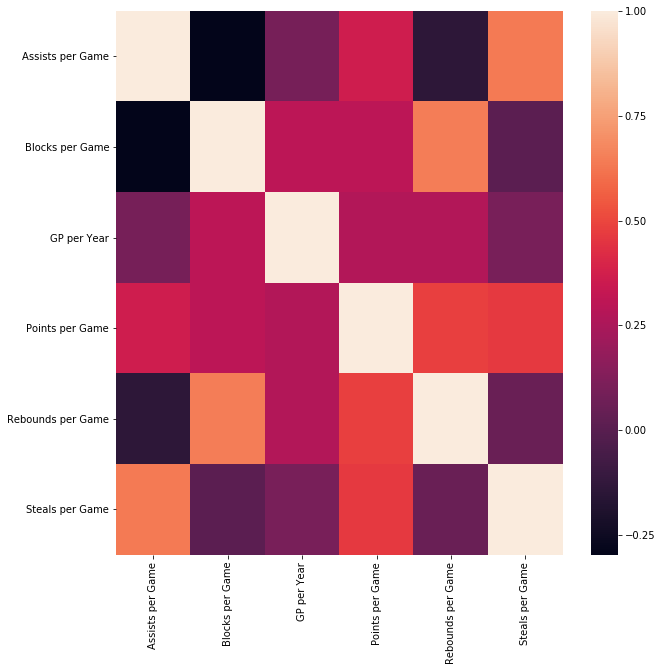

In [41]:
corr = data.corr()
# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax)
plt.savefig("./Resources/Images/random_forest.png", bbox_inches="tight")

In [42]:
importances = rf.feature_importances_
importances

array([0.07157281, 0.10474105, 0.22709293, 0.35419542, 0.15074694,
       0.09165085])

In [43]:
sorted(zip(rf.feature_importances_,feature_names), reverse=True)

[(0.3541954176200024, 'Points per Game'),
 (0.2270929341835937, 'GP per Year'),
 (0.150746941390984, 'Rebounds per Game'),
 (0.10474104973534339, 'Blocks per Game'),
 (0.09165084849652369, 'Steals per Game'),
 (0.07157280857355303, 'Assists per Game')]